<a href="https://colab.research.google.com/github/Chen-Wi-Ki/Signal-Processing-My-Notes/blob/main/GaussianAndAngleIntegralProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 訊號平均處理時積分時序被縮短之問題原因

In [224]:
import random
#等比數列
array1 = range(100)
for i in array1:
  print(i,end='\t')
print('\n')

#恆速度的理想狀態
array2 = [100] *100
for i in array2:
  print(i,end='\t')
print('\n')

#有亂數範圍的恆等速度
array22 = []
for i in range(0,100,1):
  array22.append(random.randint(97,103))
print(array22)

0	1	2	3	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	26	27	28	29	30	31	32	33	34	35	36	37	38	39	40	41	42	43	44	45	46	47	48	49	50	51	52	53	54	55	56	57	58	59	60	61	62	63	64	65	66	67	68	69	70	71	72	73	74	75	76	77	78	79	80	81	82	83	84	85	86	87	88	89	90	91	92	93	94	95	96	97	98	99	

100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	

[101, 102, 103, 98, 98, 97, 102, 100, 102, 102, 101, 97, 101, 101, 98, 103, 102, 102, 101, 103, 99, 99, 103, 100, 101, 102, 98, 103, 103, 100, 98, 100, 100, 100, 101, 97, 100, 101, 101, 102, 97, 98, 97, 97, 102, 97, 99, 98, 99, 102, 102, 99, 103, 99, 101, 99, 103, 98, 99, 103, 101, 102, 103, 103, 103, 98,

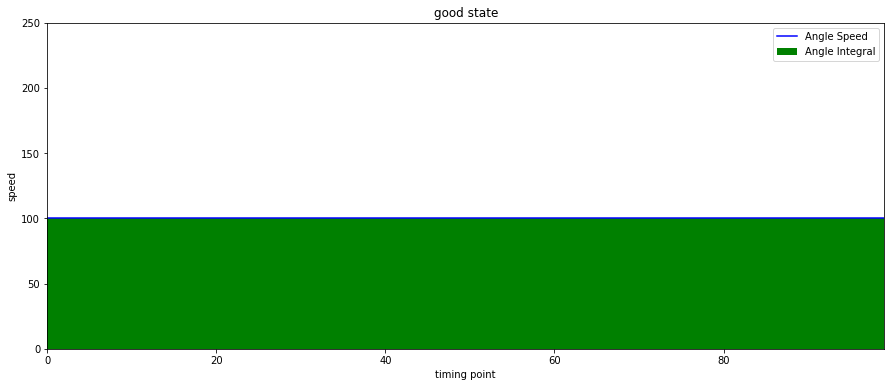

In [226]:
#恆等速下的理想狀況
from matplotlib import pyplot as plt
plt.figure(figsize = (15,6))
plt.xlabel("timing point")
plt.ylabel("speed")
plt.plot(array2,color='blue',label='Angle Speed')
plt.bar(array1,array2,color='green',width =1,label='Angle Integral')
plt.legend()
plt.xlim(0,99)
plt.ylim(0,250)
plt.title('good state')
plt.show()

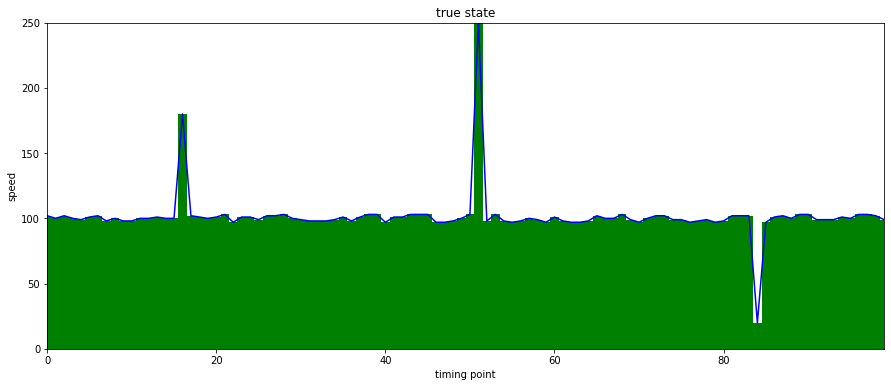

In [213]:
#實際訊號處理時會遇到的狀況
from matplotlib import pyplot as plt
plt.figure(figsize = (15,6))
plt.xlabel("timing point")
plt.ylabel("speed")
array22[16]=180#模擬凸波
array22[51]=250#模擬凸波
array22[84]=20#模擬凸波
plt.plot(array22,color='blue')
plt.bar(array1,array22,color='green',width =1)

plt.xlim(0,99)
plt.ylim(0,250)
plt.title('true state')
plt.show()

kill 11 's Number
kill 26 's Number
kill 44 's Number
kill 52 's Number
kill 56 's Number
kill 65 's Number
kill 92 's Number
[100.5, 100.9, 101.01666666666667, 100.7625, 100.23, 100.15, 100.32142857142857, 100.28125, 100.12777777777778, 100.15]


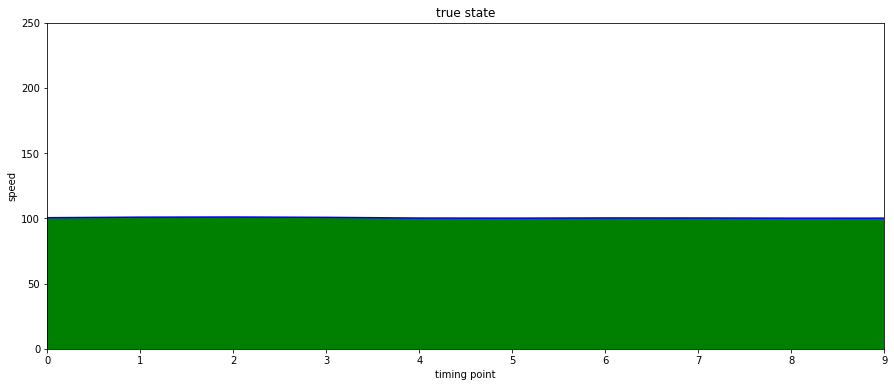

In [227]:
#高斯濾波1(鄰值比較,用於處理突波)
error_range=4
for i in range(1,99,1):
    if(abs(array22[i]-array22[i+1])>=error_range):
      if(abs(array22[i]-array22[i-1])>=error_range):
        print('kill',i,'\'s Number')
        array22[i] = (array22[i-1]+array22[i+1])/2#鄰值平均

#高斯濾波2(用於處理訊號平滑)
array_mean10=[]
for i in range(0,10,1):
  array_mean10.append(np.mean(array22[0*10:10+10*i]))
print(array_mean10)

plt.figure(figsize = (15,6))
plt.xlabel("time")
plt.ylabel("speed")
array11 = range(0,10,1)
plt.xlabel("timing point")
plt.ylabel("speed")
plt.plot(array_mean10,color='blue')
plt.bar(array11,array_mean10,color='green',width =1)

plt.xlim(0,9)
plt.ylim(0,250)
plt.title('true state')
plt.show()

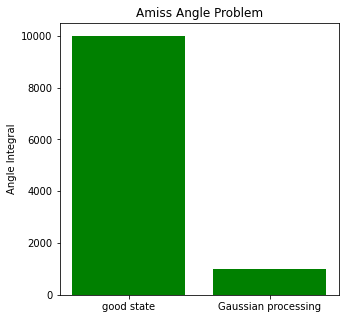

In [228]:
#綠色面積差異
x1=len(array2)*np.mean(array2)
x2=len(array_mean10)*np.mean(array_mean10)

plt.figure(figsize = (5,5))
plt.bar(['good state','Gaussian processing'],[x1,x2],color='green',width =0.8)

plt.ylabel("Angle Integral")
plt.title('Amiss Angle Problem')
plt.show()

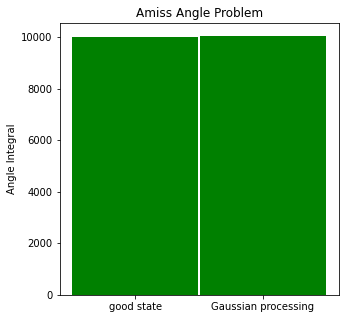

In [234]:
#處裡後訊號直接做放大10倍
x1=len(array2)*np.mean(array2)
x2=len(array_mean10)*np.mean(array_mean10)*10
plt.figure(figsize = (5,5))
plt.bar(['good state','Gaussian processing'],[x1,x2],color='green',width =0.99)
plt.ylabel("Angle Integral")
plt.title('Amiss Angle Problem')
plt.show()